# Benching Normal Naive Bayes over Varying Dataset Sizes

author: Nicholas Farn [<a href="sendto:nicholasfarn@gmail.com">nicholasfarn@gmail.com</a>]

This is a simple benchmark comparing the speed of the fit and predict methods of scikit-learn's gaussian naive bayes to the same methods in pomegranate's naive bayes. Unlike the multivariate gaussian naive bayes benchmarks, this test uses one-dimensional data and normal distributions as components.

In [1]:
from sklearn.naive_bayes import GaussianNB
from pomegranate import *
import numpy as np
import time
import seaborn
%pylab inline
seaborn.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


First there is our data set that we use to test both scikit-learn and pomegranate. The data set consists of 3,000,000 5-dimensional normally distributed points. The data has an equal number of samples for all three components. The data is generated by using numpy's randn function, then shuffling the points. The data is also made in a staggered fashion, so that an even number of samples for each component is contained in the first 10, then 30, then 100, etc. samples. The size roughly increases by a factor of 3 each time.

In [2]:
sizes = [ 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000 ]

X = np.concatenate(( np.random.randn(sizes[0], 1) + 2,
					 np.random.randn(sizes[0], 1) + 3,
					 np.random.randn(sizes[0], 1) + 4))

y = np.concatenate(( np.zeros(sizes[0]), np.ones(sizes[0]), np.ones(sizes[0]) + 1))

index = np.arange( 3*sizes[0] )
np.random.shuffle( index )

X = X[index]
y = y[index]

for i in range(1, len(sizes)):
	size = sizes[i] - sizes[i-1]

	temp_X = np.concatenate(( np.random.randn(size, 1) + 2,
							  np.random.randn(size, 1) + 3,
							  np.random.randn(size, 1) + 4))
	temp_y = np.concatenate(( np.zeros(size), np.ones(size), np.ones(size) + 1))
	
	index = np.arange( 3*size )
	np.random.shuffle( index )

	X = np.concatenate( ( X, temp_X[index] ) )
	y = np.concatenate( ( y, temp_y[index] ) )

We now create our scikit-learn and pomegranate normal naive bayes instances. Note that if a multivariate gaussian distribution is desired, a ```MultivariateGaussianDistribution``` must be fed into the constructor for pomegranate. This has advantages and disadvantages as pomegranate's implementation of naive bayes can take any model that outputs a probability as a component. For example discrete or even hidden markov models.

In [3]:
skl = GaussianNB()
pom = NaiveBayes( NormalDistribution )

We now feed in our data set from before in order to bench the fit and prediction times and relative error of each implementation. We use the staggered feature of our data set in order to easily bench each implementation on data sets of various sizes without having to generate a new one for each size.

In [4]:
skl_predict = list()
skl_fit = list()
skl_error = list()

pom_predict = list()
pom_fit = list()
pom_error = list()

for i in range(len(sizes)):
	size = 3*sizes[i]

	# bench fit times
	tic = time.time()
	skl.fit( X[:size], y[:size] )
	skl_fit.append( time.time() - tic )

	tic = time.time()
	pom.fit( X[:size], y[:size] )
	pom_fit.append( time.time() - tic )

	# bench predict times
	tic = time.time()
	skl_predictions = skl.predict( X[:size] )
	skl_predict.append( time.time() - tic )

	tic = time.time()
	pom_predictions = pom.predict( X[:size] )
	pom_predict.append( time.time() - tic )

	# check number wrong
	skl_error.append( float(( y[:size] != skl_predictions ).sum()) / size )
	pom_error.append( float(( y[:size] != pom_predictions ).sum()) / size )

Now we can view our results. Below is a plot of the benched speed for fitting for both scikit-learn and pomegranate over the number of samples per a component. As you can see, scikit-learn and pomegranate stay relatively the same in terms of speed for the various data set sizes. Note that all of the plots are logarithmic.

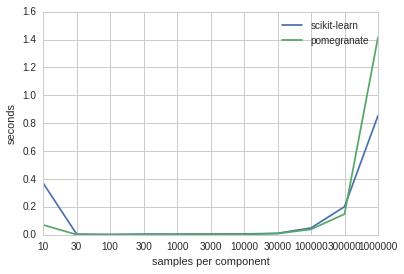

In [12]:
skl_line, = pylab.plot(skl_fit, label='scikit-learn')
pom_line, = pylab.plot(pom_fit, label='pomegranate')
pylab.xticks(range(len(sizes)), sizes)
pylab.xlabel('samples per component')
pylab.ylabel('seconds')
pylab.legend(handles=[skl_line, pom_line])
pylab.show()

Here is a plot of the benched speed for prediction for both scikit-learn and pomegranate over number of samples per component. Note that while scikit-learn and pomegranate have relatively the same speed for smaller data sizes, pomegranate benchmark speed increases at a faster rate than scikit-learn.

In [ ]:
skl_line, = pylab.plot(skl_predict, label='scikit-learn')
pom_line, = pylab.plot(pom_predict, label='pomegranate')
pylab.xticks(range(len(sizes)), sizes)
pylab.xlabel('samples per component')
pylab.ylabel('seconds')
pylab.legend(handles=[skl_line, pom_line])
pylab.show()

In both cases, we can see that both pomegranate and scikit-learn have the exact same error. This is to be expected as they should output the same $\mu$ and $\sigma$ values after being fit to the same data set.

In [ ]:
skl_line, = pylab.plot(skl_error, label='scikit-learn')
pom_line, = pylab.plot(pom_error, label='pomegranate')
pylab.xticks(range(len(sizes)), sizes)
pylab.xlabel('samples per component')
pylab.ylabel('seconds')
pylab.legend(handles=[skl_line, pom_line])
pylab.show()

As one can see, both pomegranate and scikit-learn have comparable bench speed for all data sets. With scikit-learn doing slightly worse for a few very small data sets and pomegranate having worse speed for larger data sets. Error in both are the same, which is to be expected.